# Starter Classes

All neccesary classes and start of project

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import scipy.stats as ss
import pandas as pd
import numpy as np
import os
import pickle

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores
from Utilities.utilities import pipeline_transform
from Utilities.utilities import reset_graph
from Utilities.models import DNN_Model
from Utilities.models import cross_val_score_dnn

#image manipulation
from PIL import Image
from resizeimage import resizeimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.utils.data_utils import get_file
TF_BACKEND_TF_DIM_ORDERING = "C:/Users/sdgeo/Dropbox/Own/Programming/Inception/weights/"

Using TensorFlow backend.


# Build resnet V4

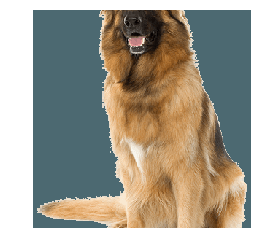

In [2]:
with open("C:/Users/sdgeo/Dropbox/Own/Programming/Python/MachineLearningDemo/Playground/ml/test_images/dog.png", 'r+b') as f:
    with Image.open(f) as image:
        cover = resizeimage.resize_cover(image, [299, 299])
        cover.save("C:/Users/sdgeo/Dropbox/Own/Programming/Python/MachineLearningDemo/Playground/ml/test_images/dog_shaped.png", image.format)
test_image = mpimg.imread("C:/Users/sdgeo/Dropbox/Own/Programming/Python/MachineLearningDemo/Playground/ml/test_images/dog_shaped.png")[:, :, :3]
plt.imshow(test_image)
plt.axis("off")
plt.show()
test_image = 2 * test_image - 1
X_test = test_image.reshape(1, 299, 299, 3)
X_test = X_test.reshape(1,299,299,3)

In [3]:
from inception_v4 import create_inception_v4
reset_graph()

model = create_inception_v4()

C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(2, 2), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1), padding="valid", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:42: UserWarning: Upda

C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (7, 1), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(224, (7, 1), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 7), strides=(1, 1), padding="same", use_bias=False)`
  x = Convolution2D(nb_filter, nb_row, nb_col, subsample=subsample, border_mode=border_mode, bias=bias)(x)
C:\Users\sdgeo\Dropbox\Own\Programming\Inception\inception_v4.py:104: UserWarning: Up

171802624/171799220 [==============================] - 11s 0us/step
Model weights loaded.


In [ ]:
model.summary()

In [ ]:
weights = get_file('inception_v4_weights_tf_dim_ordering_tf_kernels.h5', TF_BACKEND_TF_DIM_ORDERING,
                                   cache_subdir='models')
model.load_weights(weights)


In [ ]:
filewriter = tf.summary.FileWriter("current_graph.ckpt", tf.get_default_graph())
saver = tf.train.Saver()

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    block = set(sess.run(tf.report_uninitialized_variables()))
    print(len(block))

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    items = tf.global_variables()
    print(len(items))

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    
    tf.variables_initializer(
        [v for v in tf.global_variables() if v.name.split(':')[0] in set(sess.run(tf.report_uninitialized_variables()))
    ])
    saver.save(sess, "current_run.ckpt")
    trainable = tf.trainable_variables()

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    init.run()
    saver.save(sess, "C:/Users/sdgeo/Dropbox/Own/Programming/Inception/Inception/my_inception.ckpt")
    X_tensor = tf.get_default_graph().get_tensor_by_name("input_1:0")
    dense_layer = tf.get_default_graph().get_tensor_by_name("dense_1/Softmax:0")
    y_raw = dense_layer.eval(feed_dict={X_tensor: X_test})

In [ ]:
with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
    saver.restore(sess, "C:/Users/sdgeo/Dropbox/Own/Programming/Inception/Inception/my_inception.ckpt")
    X_tensor = tf.get_default_graph().get_tensor_by_name("input_1:0")
    dense_layer = tf.get_default_graph().get_tensor_by_name("dense_1/Softmax:0")
    y_raw = dense_layer.eval(feed_dict={X_tensor: X_test})

In [ ]:
frame = pd.DataFrame(y_raw)
item = np.argmax(y_raw)
y_raw

# Import the training Data

Here the data is imported

In [ ]:
#Get Data

raw_data = import_data("richard_rppa_labeled_raw2.csv", "C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/raw_data").drop("Unnamed: 0", axis=1).drop("replicate", axis=1)
#raw_data_subsets = import_data("protein_list_final_final.csv")

#For doing NS v KRAS
raw_data_KRAS = raw_data.loc[raw_data["target"] == 'KRAS_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si1', 'KD')
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si2', 'KD')

#For doing NS v MYC
raw_data_MYC = raw_data.loc[raw_data["target"] == 'MYC_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si1', 'KD')
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si2', 'KD')


#For Doing Cell Line
raw_data_all = raw_data.drop("target", axis=1).drop("construct", axis=1)

#For doing both NS vs KRAS and MYC
raw_data_KVM = raw_data.copy()
raw_data_KVM["construct"] = raw_data_KVM["construct"].replace('si1', 'KD')
raw_data_KVM["construct"] = raw_data_KVM["construct"].replace('si2', 'KD')
raw_data_KVM["treatment"] = raw_data_KVM["target"] + raw_data_KVM["construct"]
cols = list(raw_data_KVM)
cols.insert(1, cols.pop(cols.index('treatment')))
raw_data_KVM = raw_data_KVM.loc[:, cols].drop("target", axis=1).drop("construct", axis=1).reset_index().drop("index", axis=1)

#For doing KRAS-KD vs MYC-KD
raw_data_KVM_ONLY = raw_data.copy().loc[raw_data["construct"] != 'NS']
raw_data_KVM_ONLY["construct"] = raw_data_KVM_ONLY["construct"].replace('si1', 'KD')
raw_data_KVM_ONLY["construct"] = raw_data_KVM_ONLY["construct"].replace('si2', 'KD')
raw_data_KVM_ONLY["treatment"] = raw_data_KVM_ONLY["target"] + raw_data_KVM_ONLY["construct"]
cols = list(raw_data_KVM_ONLY)
cols.insert(1, cols.pop(cols.index('treatment')))
raw_data_KVM_ONLY = raw_data_KVM_ONLY.loc[:, cols].drop("target", axis=1).drop("construct", axis=1).reset_index().drop("index", axis=1)

#For doing NSK vs NSM
raw_data_NS = raw_data_KVM.loc[raw_data_KVM['treatment'] != 'KRAS_KD']
raw_data_NS = raw_data_NS.loc[raw_data_NS['treatment'] != 'MYC_KD'].reset_index().drop("index", axis=1)
raw_data_NS

# Prepare Data for Machine Learning

This work flow will break apart a training set and test set as well as put the data through a pipeline to prepare it for fitting to a model

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(raw_data_all, raw_data_all["cell.line"]):
    strat_train = raw_data_all.loc[train_index]
    strat_test = raw_data_all.loc[test_index]
    
for train_index, test_index in split.split(raw_data_KVM, raw_data_KVM["cell.line"]):
    strat_train_KVM = raw_data_KVM.loc[train_index]
    strat_test_KVM = raw_data_KVM.loc[test_index]
    
for train_index, test_index in split.split(raw_data_KVM_ONLY, raw_data_KVM_ONLY["cell.line"]):
    strat_train_KVM_ONLY = raw_data_KVM_ONLY.loc[train_index]
    strat_test_KVM_ONLY = raw_data_KVM_ONLY.loc[test_index]


for train_index, test_index in split.split(raw_data_KRAS, raw_data_KRAS["cell.line"]):
    strat_train_KRAS = raw_data_KRAS.loc[train_index]
    strat_test_KRAS = raw_data_KRAS.loc[test_index]

for train_index, test_index in split.split(raw_data_MYC, raw_data_MYC["cell.line"]):
    strat_train_MYC = raw_data_MYC.loc[train_index]
    strat_test_MYC = raw_data_MYC.loc[test_index]
    
for train_index, test_index in split.split(raw_data_NS, raw_data_NS["cell.line"]):
    strat_train_NS = raw_data_NS.loc[train_index]
    strat_test_NS = raw_data_NS.loc[test_index]

    
strat_train_NS

In [ ]:
#Cell_Line
raw_train_cell = strat_train.drop("cell.line", axis=1)
train_labels_cell = pd.DataFrame(strat_train["cell.line"].copy())

raw_test_cell = strat_test.drop("cell.line", axis=1)
test_labels_cell = pd.DataFrame(strat_test["cell.line"].copy())

#KRAS vs MYC All
raw_train_KVM = strat_train_KVM.drop("treatment", axis=1)
train_labels_KVM = pd.DataFrame(strat_train_KVM["treatment"].copy())

raw_test_KVM = strat_test_KVM.drop("treatment", axis=1)
test_labels_KVM = pd.DataFrame(strat_test_KVM["treatment"].copy())

#KRAS vs MYC Only
raw_train_KVM_ONLY = strat_train_KVM_ONLY.drop("treatment", axis=1)
train_labels_KVM_ONLY = pd.DataFrame(strat_train_KVM_ONLY["treatment"].copy())

raw_test_KVM_ONLY = strat_test_KVM_ONLY.drop("treatment", axis=1)
test_labels_KVM_ONLY = pd.DataFrame(strat_test_KVM_ONLY["treatment"].copy())

#KRAS_Treatment
raw_train_KRAS = strat_train_KRAS.drop("construct", axis=1)
train_labels_KRAS = pd.DataFrame(strat_train_KRAS["construct"].copy())

raw_test_KRAS = strat_test_KRAS.drop("construct", axis=1)
test_labels_KRAS = pd.DataFrame(strat_test_KRAS["construct"].copy())

#MYC_Treatment
raw_train_MYC = strat_train_MYC.drop("construct", axis=1)
train_labels_MYC = pd.DataFrame(strat_train_MYC["construct"].copy())

raw_test_MYC = strat_test_MYC.drop("construct", axis=1)
test_labels_MYC = pd.DataFrame(strat_test_MYC["construct"].copy())

#NS
raw_train_NS = strat_train_NS.drop("treatment", axis=1)
train_labels_NS = pd.DataFrame(strat_train_NS["treatment"].copy())

raw_test_NS = strat_test_NS.drop("treatment", axis=1)
test_labels_NS = pd.DataFrame(strat_test_NS["treatment"].copy())



raw_train_cell

In [ ]:
#Cell Line
train_cell = pipeline_transform(raw_train_cell)
test_cell = pipeline_transform(raw_test_cell)

#Kras vs Myc All
train_KVM = pipeline_transform(raw_train_KVM)
test_KVM = pipeline_transform(raw_test_KVM)

#Kras vs Myc Only
train_KVM_ONLY = pipeline_transform(raw_train_KVM_ONLY)
test_KVM_ONLY = pipeline_transform(raw_test_KVM_ONLY)

#KRAS
train_KRAS = pipeline_transform(raw_train_KRAS)
test_KRAS = pipeline_transform(raw_test_KRAS)

#MYC
train_MYC = pipeline_transform(raw_train_MYC)
test_MYC = pipeline_transform(raw_test_MYC)

#NS
train_NS = pipeline_transform(raw_train_NS)
test_NS = pipeline_transform(raw_test_NS)


train_cell

# Ready for Machine Learning:

At this point the data is in the proper format for training your model. Relevant variables listed below:

The Training Data:

x_train_data - The X in your model. These are what we are going to use to make predictions. 

y_train_data - The Y in your model. These are the values you are going to try and predict.

The Test Data:

x_test_data - The X data for your test data. Use this to test your completed model 

y_test_data - the Y data for your test data. Use this to test your model againt real predictions

In [ ]:
X_train = train_KVM_ONLY
Y_train = train_labels_KVM_ONLY

X_test = test_KVM_ONLY
Y_test = test_labels_KVM_ONLY

In [ ]:
#Fit a decision Tree

tree_clf = DecisionTreeClassifier(max_depth=150)
tree_clf.fit(X_train, Y_train)

In [ ]:
# Export the tree

export_graphviz(
    tree_clf,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/RPPA_Analysis/decision_tree_KVM_ONLY.dot",
    feature_names=list(X_train.columns.values),
    class_names=list(map(str, tree_clf.classes_)),
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_KVM_ONLY.dot -o decision_tree_KVM_ONLY.png")

In [ ]:
# Export the tree

export_graphviz(
    tree_clf_cell,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/decision_tree_cell.dot",
    feature_names=list(cell_train.columns.values),
    class_names=classes_cell,
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_cell.dot -o decision_tree_cell.png")

In [ ]:
pred = tree_clf.predict(X_test)
confusion_matrix(pred, Y_test)

In [ ]:
score = f1_score(pred, Y_test, average="macro")
score

# Random Forest Model with RandomSearchCV


Uses a random forest and GridSearchCV to predict the hyperparameters and generate a model

In [ ]:
X_train = train_KVM_ONLY
Y_train = train_labels_KVM_ONLY

X_test = test_KVM_ONLY
Y_test = test_labels_KVM_ONLY

In [ ]:
#Do a random search for best iterations

param_grid_random = {
        'n_estimators': list(range(300,400)),
        'max_features': list(range(30,150)),
    }

forest_reg_rand_clf = RandomForestClassifier(bootstrap = True)

for_random_clf = RandomizedSearchCV(forest_reg_rand_clf, param_distributions=param_grid_random,
                                n_iter=1000, cv=5, scoring='f1_macro',
                                verbose=2, n_jobs=-1, random_state=42)


for_random_clf.fit(X_train, Y_train)

# Save Models

Use this to save any models that you have created

In [ ]:
# Code to save a model

pickle.dump(for_random_clf, open('C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/models/random_forest_MYC.sav', 'wb'))

In [ ]:
#can load it with this code

loaded_model = pickle.load(open('C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/models/random_forest_MYC.sav', 'rb'))

In [ ]:
pred = loaded_model.best_estimator_.predict(X_test)
score = f1_score(pred,Y_test, average='macro')
score

# Evaluate Fits 

Test to see if the fits are good and give metrics

In [ ]:
X_train = train_MYC
Y_train = train_labels_MYC

X_test = test_MYC
Y_test = test_labels_MYC

In [ ]:
search_found = loaded_model

In [ ]:
search_found.best_params_

In [ ]:

feature_importances = search_found.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns.values), reverse=True)

In [ ]:
scores = cross_val_score(search_found.best_estimator_, X_train, Y_train, scoring="f1_macro", cv=5)
scores

In [ ]:
pred = search_found.best_estimator_.predict(X_test)
confusion_matrix(pred, Y_test)

In [ ]:
score = f1_score(pred, Y_test, average="macro")
score

# PCA

In [ ]:
pca = PCA(n_components = 4)
X2D = pca.fit_transform(X_train)

pca.explained_variance_ratio_

In [ ]:
cumsum = np.sum(pca.explained_variance_ratio_)

In [ ]:
cumsum

# Unsupervised Learning

In [ ]:

clustering_data_train = pipeline_transform(X_train, scaler=True)
clustering_data_test = pipeline_transform(X_test, scaler=True)
clustering_data_train_labels = Y_train.reset_index().drop("index", axis=1)
clustering_data_test_labels = Y_test.reset_index().drop("index", axis=1)

clustering_data_train

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data_train)
predicted = kmeans.predict(clustering_data_test)

In [ ]:
clustering_train_post = clustering_data_train.copy()
clustering_train_post["cluster"] = kmeans.labels_
clustering_train_post["cell.line"] = clustering_data_train_labels["cell.line"]

clustering_test_post = clustering_data_test.copy()
clustering_test_post["cluster"] = predicted
clustering_test_post["cell.line"] = clustering_data_test_labels["cell.line"]

clustering_test_post

In [ ]:
cluster_train_post = clustering_train_post.copy()
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['PANC1'], 3)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa02C'], 0)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa14C'], 4)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['HPAFII'], 2)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa16C'], 1)

cluster_test_post = clustering_test_post.copy()
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['PANC1'], 3)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa02C'], 0)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa14C'], 4)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['HPAFII'], 2)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa16C'], 1)

cluster_test_post

In [ ]:
cluster_test_post.plot(kind="scatter", x="cell.line", y="cluster", alpha=0.1)

In [ ]:
cell_corr = ss.spearmanr(cluster_test_post["cell.line"], cluster_test_post["cluster"])
cell_corr

# DNN

Here we will build a 2 layer neural network and see what the best predictability possible is:

In [ ]:
X_train_tensor = pipeline_transform(train_NS, scaler=True).as_matrix()
Y_train_tensor = train_labels_NS.copy()
Y_train_tensor['treatment'] = train_labels_NS['treatment'].replace('KRAS_NS', 0)
Y_train_tensor['treatment'] = Y_train_tensor['treatment'].replace('MYC_NS', 1)
Y_train_tensor = Y_train_tensor.as_matrix()[:, 0]

X_test_tensor = pipeline_transform(test_NS, scaler=True).as_matrix()
Y_test_tensor = test_labels_NS.copy()
Y_test_tensor['treatment'] = test_labels_NS['treatment'].replace('KRAS_NS', 0)
Y_test_tensor['treatment'] = Y_test_tensor['treatment'].replace('MYC_NS', 1)
Y_test_tensor = Y_test_tensor.as_matrix()[:, 0]

Y_test_tensor

In [ ]:
model = DNN_Model(n_outputs=4, log_dir="C:/tmp/RichardRPPA/tf_logs_NS")


In [ ]:
scores = cross_val_score_dnn(model, X_train_tensor, Y_train_tensor)
scores

In [ ]:
avg = np.mean(scores)
avg

In [ ]:
y_pred = model.predict(X_test_tensor)
score = f1_score(y_pred, Y_test_tensor, average="macro")

In [ ]:
score

# Support Vector Machine Regressor fits

Here are going to build yet another model and find how good its fit is

In [ ]:
#test a basic model using cross_val_score

svm_reg = SVR()

svm_reg.fit(prepared_data, data_labels)
kir_scores = cross_val_score(svm_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg

In [ ]:
#Use random search here to optomize SVM

param_distribs = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': list(range(1,1000)),
        'gamma': expon(scale=1.0),
        'degree': list(range(1,4)),
        'coef0': [1]
    }

y_train_data_short = (y_train_data == 'Pa02C')

svm_reg = SVR()
svm_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=2000, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
svm_search.fit(x_train_data, y_train_data_short)

In [ ]:
svm_search.best_params_


In [ ]:
ovo_clf = OneVsOneClassifier(SVR(C=226, coef0=1, degree=1, gamma= 0.349, kernel='rbf'))

#Use random search here to optomize SVM

ovo_clf.fit(x_train_data, y_train_data)

In [ ]:
negative_mse = svm_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
svm_search.best_params_

# Test the parameters you would like to see how well any regression performs

Here you can test your differnt models to see how well the model fits the test data 

In [ ]:
#prepare and select data from test set

#final_model = search_found.best_estimator_
#final_model = for_clf
#final_model = loaded_model
final_model = ovo_clf

In [ ]:
#Look at predictions rmse

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
final_predictions = final_model.predict(x_test_data)
score = f1_score(y_test_data, final_predictions, average='macro')
print(score)

In [ ]:
#Test binary evaluation with treatment status

Y_test_cond = (Y_test > .5)
pred_cond = (final_predictions > .5 )
confusion_matrix(Y_test_cond, pred_cond)

In [ ]:
score = f1_score(Y_test_cond, pred_cond)
print(score)

In [ ]:
confusion_matrix(final_predictions, Y_test)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(X_test_prepared)
plot_data.hist(bins=20, figsize=(40,30))
plt.show()

In [ ]:
final_predictions

In [ ]:
y_test_data